# Keras Regression Code Along Project 

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Exploratory Data Analysis - Part 1

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('white')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the data
df = pd.read_csv('../DATA/kc_house_data.csv')

In [9]:
# check for missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No missing data - > we are good to go

In [11]:
# check the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# statistical analysis
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


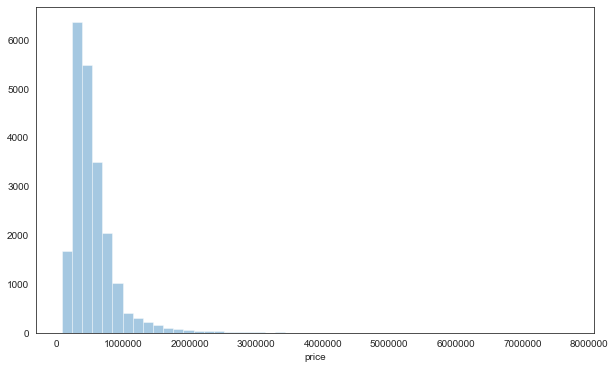

In [17]:
# distribution plot of the price feature
plt.figure(figsize=(10,6))
sns.distplot(df['price'], kde=False)

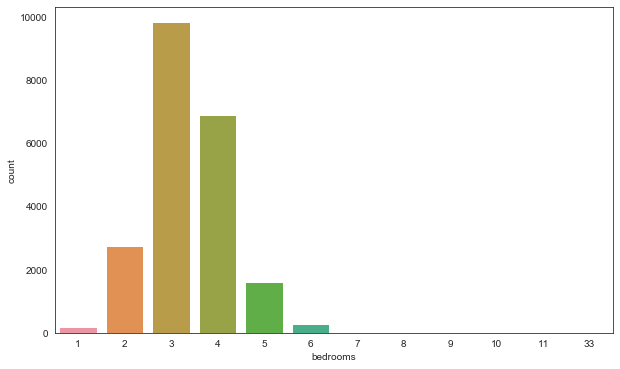

In [18]:
# check the distribution of Number of bedrooms
plt.figure(figsize=(10,6))
sns.countplot(df['bedrooms'])

In [22]:
# check which features are the most correlated with the price variable
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

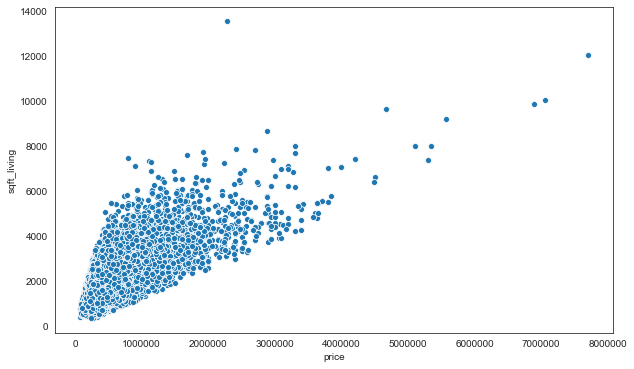

In [25]:
# Check the scatter plot of Square Fit Living Area against Price
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'price', y = 'sqft_living', data = df)

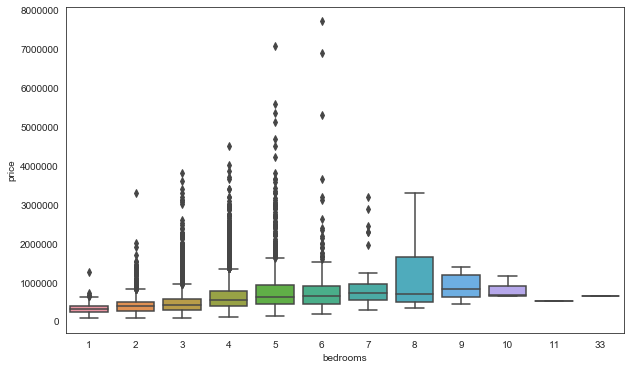

In [28]:
# Check the boxplot of Number of bedrooms against Price
plt.figure(figsize=(10,6))
sns.boxplot(x = 'bedrooms', y = 'price', data = df)

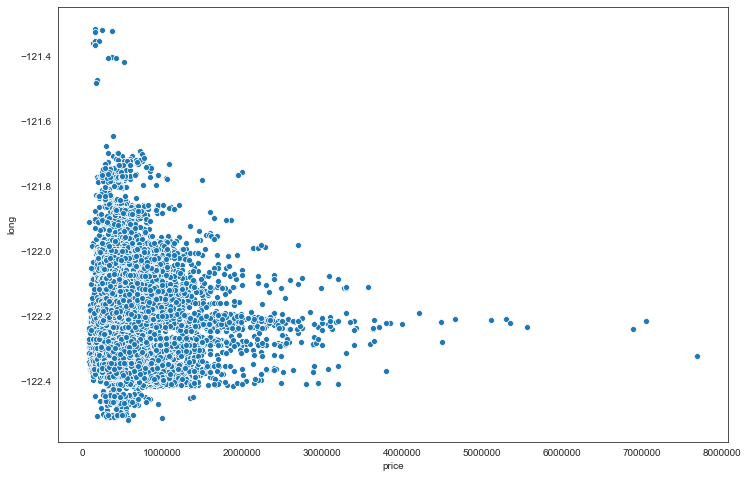

In [30]:
# explore the relation between longitude and price
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'price', y = 'long', data = df)

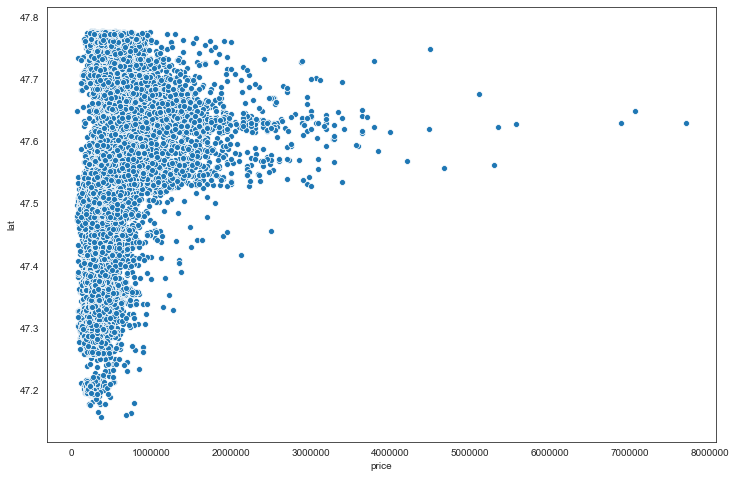

In [31]:
# explore the relation between latitude and price
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'price', y = 'lat', data = df)

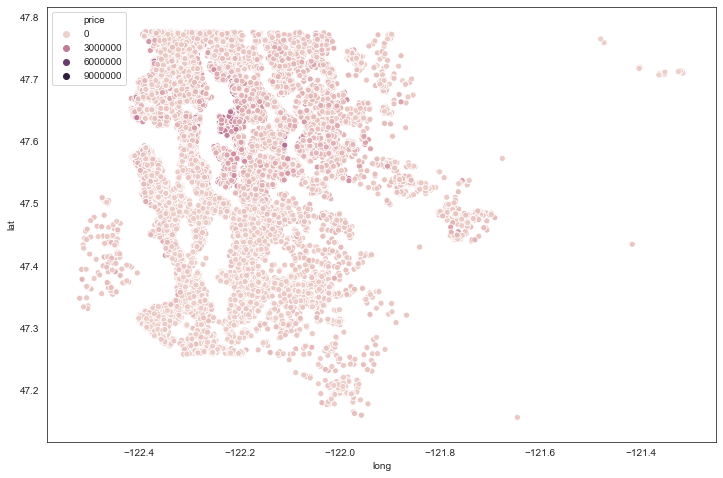

In [36]:
# try to plot the map with langitude and latitude
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'long', y = 'lat', data = df, hue = 'price')

The outliers in price are affecting the colour gradient of this "map" - let's try to remove them

In [35]:
# get the top 10 most expensive houses
df.sort_values('price', ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [39]:
# check how many houses we have
len(df)

21597

In [40]:
# how many records would we drop if we filter the top 1% priced houses?
len(df)*0.01

215.97

In [41]:
# let's create a new data frame withoud the outliers
bottom_99 = df.sort_values('price', ascending=False).iloc[216:]

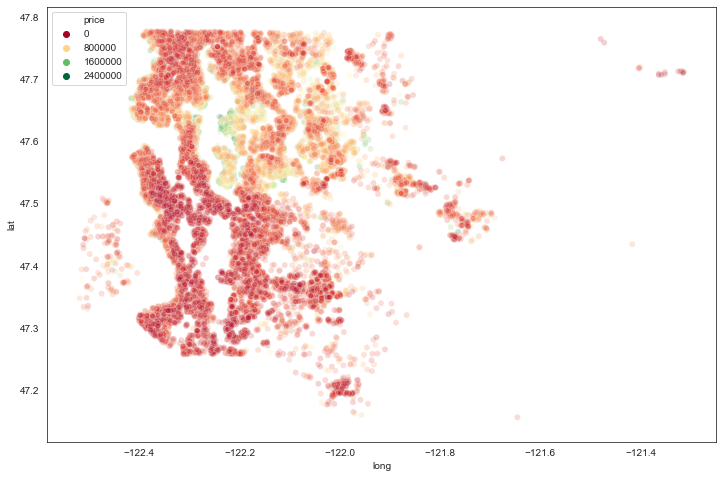

In [49]:
# hopefully the map will make more sense now
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'long', y = 'lat', data = bottom_99, alpha = 0.2, palette='RdYlGn', hue = 'price')

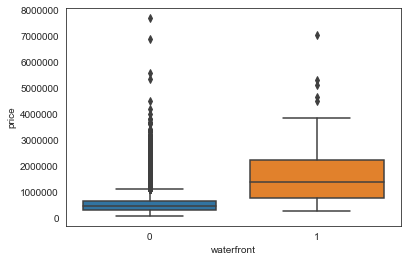

In [50]:
# seems like the water front houses are more expensive
sns.boxplot(x = 'waterfront', y = 'price', data = df)

## Feature Engeneering - Part 2

In [51]:
# drop the id columns
df = df.drop('id', axis = 1)

In [53]:
# convert the date to datetime object
df['date'] = pd.to_datetime(df['date'])

In [54]:
# create a year column
df['year'] = df['date'].apply(lambda date: date.year)

In [56]:
# create a month column
df['month'] = df['date'].apply(lambda date: date.month)

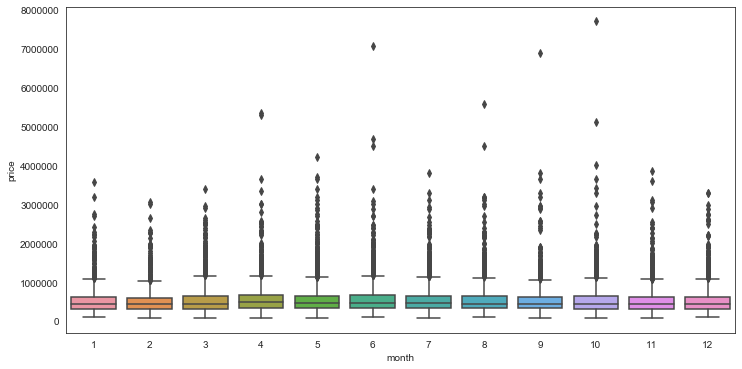

In [60]:
# understand if exists differences in the prices across months
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'month', y = 'price', data = df)

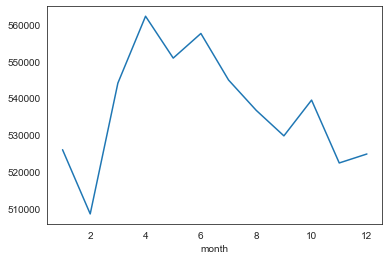

In [63]:
# check the mean by month
df.groupby(by = 'month')['price'].mean().plot()

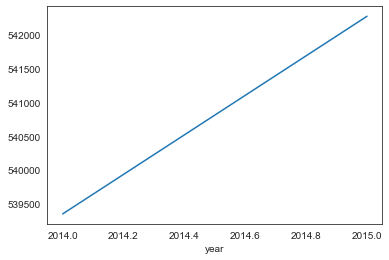

In [65]:
# check the same for year
df.groupby(by = 'year').mean()['price'].plot()

In [67]:
# drop the date column
df = df.drop('date', axis = 1)

In [69]:
# drop the zip code column
df = df.drop('zipcode', axis = 1)

In [71]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

## Creating the model

In [89]:
# creating our feature and target inputs
x = df.drop('price', axis = 1).values

y = df['price'].values

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
# creating the train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [92]:
# time for scaling
from sklearn.preprocessing import MinMaxScaler

In [93]:
# create our scaler
scaler = MinMaxScaler()

In [94]:
# transform our training data set into a normalized version
x_train = scaler.fit_transform(x_train)

In [95]:
# transform our test data into a normalized version
x_test = scaler.fit_transform(x_test)

In [96]:
# importing sequential and dense to build our ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [100]:
# create our model
model = Sequential()

model.add(Dense(19, activation='relu')) # setting the input neurons

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1)) # output layer

# compile our model
model.compile(optimizer='adam', loss = 'mse')

In [101]:
# train the model
model.fit(x = x_train, y = y_train, 
          validation_data=(x_test, y_test), 
          batch_size=128, epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 67us/sample - loss: 430208060760.1783 - val_loss: 418694390832.0395
Epoch 2/400
15117/15117 [==============================] - 0s 22us/sample - loss: 422115114273.1748 - val_loss: 387049798021.3729
Epoch 3/400
15117/15117 [==============================] - 0s 22us/sample - loss: 273719394208.6245 - val_loss: 121955474040.0988
Epoch 4/400
15117/15117 [==============================] - 0s 23us/sample - loss: 100227973137.3410 - val_loss: 94443657403.1012
Epoch 5/400
15117/15117 [==============================] - 0s 32us/sample - loss: 95190949415.9995 - val_loss: 91043273042.8049
Epoch 6/400
15117/15117 [==============================] - 0s 26us/sample - loss: 91392756587.5854 - val_loss: 87390241627.6543
Epoch 7/400
15117/15117 [==============================] - 0s 22us/sample - loss: 87081196102.6849 - val_loss: 82319641703.6642
Epoch 8/400
15117/15117 [=======================

15117/15117 [==============================] - 0s 24us/sample - loss: 31933434628.7586 - val_loss: 33966017836.8790
Epoch 128/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31914454855.1422 - val_loss: 35264362834.8049
Epoch 129/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31883662044.6575 - val_loss: 35262987529.4815
Epoch 130/400
15117/15117 [==============================] - 0s 23us/sample - loss: 31829348945.3198 - val_loss: 33849048430.6173
Epoch 131/400
15117/15117 [==============================] - 0s 23us/sample - loss: 31861953227.5875 - val_loss: 35450338711.0716
Epoch 132/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31816573811.9172 - val_loss: 35374832025.6000
Epoch 133/400
15117/15117 [==============================] - 0s 23us/sample - loss: 31849075129.5860 - val_loss: 35031287904.0790
Epoch 134/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31752331204.1193 - v

15117/15117 [==============================] - 0s 21us/sample - loss: 29974922130.1962 - val_loss: 35919307631.8815
Epoch 254/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30078377856.9229 - val_loss: 33899430606.0642
Epoch 255/400
15117/15117 [==============================] - 0s 20us/sample - loss: 30044618917.2815 - val_loss: 35928802003.1210
Epoch 256/400
15117/15117 [==============================] - 0s 20us/sample - loss: 29963578714.6847 - val_loss: 34390630440.4543
Epoch 257/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29906761481.9067 - val_loss: 35575592449.2642
Epoch 258/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29922493994.8445 - val_loss: 36067383017.8765
Epoch 259/400
15117/15117 [==============================] - 0s 20us/sample - loss: 29955175519.3078 - val_loss: 35462766804.3852
Epoch 260/400
15117/15117 [==============================] - 0s 27us/sample - loss: 29890809998.2504 - v

15117/15117 [==============================] - 0s 23us/sample - loss: 28655347939.7362 - val_loss: 33287270870.2815
Epoch 380/400
15117/15117 [==============================] - 0s 26us/sample - loss: 28636742583.8587 - val_loss: 37668683032.6519
Epoch 381/400
15117/15117 [==============================] - 0s 23us/sample - loss: 28675923172.2781 - val_loss: 35105758736.4346
Epoch 382/400
15117/15117 [==============================] - 0s 24us/sample - loss: 28627795033.2114 - val_loss: 33271784799.4469
Epoch 383/400
15117/15117 [==============================] - 0s 19us/sample - loss: 28640144635.2414 - val_loss: 33670674791.0321
Epoch 384/400
15117/15117 [==============================] - 0s 20us/sample - loss: 28670028007.1231 - val_loss: 33424357649.0667
Epoch 385/400
15117/15117 [==============================] - 0s 23us/sample - loss: 28573496703.0263 - val_loss: 35307448527.3284
Epoch 386/400
15117/15117 [==============================] - 0s 19us/sample - loss: 28597310152.8780 - v

In [104]:
# dave the model loss into a data frame
model_loss = pd.DataFrame(model.history.history)

<Figure size 864x432 with 0 Axes>

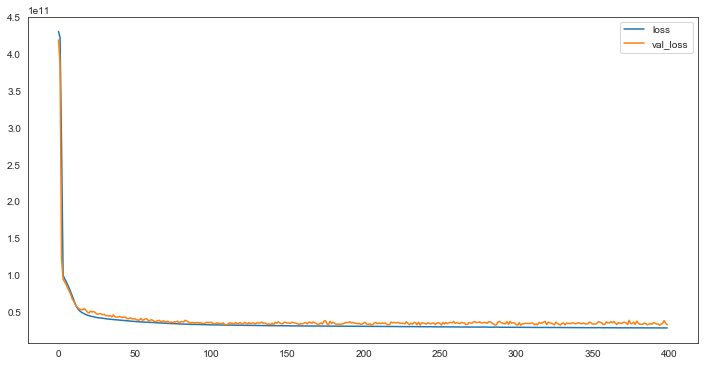

In [109]:
# plot our model loss
model_loss.plot(figsize=(12, 6))

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [111]:
# get out predictions
predictions = model.predict(x_test)

In [115]:
# evaluate our model
print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))

MAE:  112073.34349681714
MSE:  32821891158.62797
RMSE:  181168.1295333922


In [118]:
# understand if the metrics look good or not
df['price'].describe() # get the mean of the price
112073 / 5.402966e+05 # we seem to be off ~20% of the price

0.20742866048018813

In [121]:
# use the explained variance score to understand the % of variance that our model is able to capture
print('Exaplained Variable: ', explained_variance_score(y_test, predictions))

Exaplained Variable:  0.7901817910306215


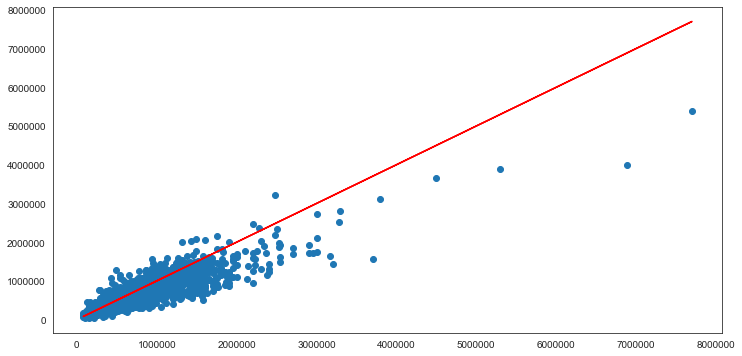

In [124]:
# plot the predicted vs the real
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, color = 'r') # prediction line

In [125]:
# predict a new unseen instance
new_instance = df.drop('price', axis = 1).iloc[0]

In [133]:
# scale the data
new_instance = scaler.transform(new_instance.values.reshape(-1, 19))

In [134]:
# predict new instance
model.predict(new_instance)

array([[239822.06]], dtype=float32)

In [135]:
# get the real price
df['price'].iloc[0]

221900.0